In [2]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.5/983.5 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [6]:
import ultralytics as ul
from ultralytics import YOLO
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display
import requests
import cv2
import os

In [7]:
model = YOLO("yolov8n.pt")

100%|██████████| 6.25M/6.25M [00:00<00:00, 121MB/s]


In [8]:
img_path = '/content/drive/MyDrive/bus.jpg'
img = Image.open(img_path)

In [9]:
def  object_detection(images_dir, output_dir, model_path="yolov8n.pt"):
    os.makedirs(output_dir, exist_ok=True)  # Create output directory if it doesn't exist
    image_files = [f for f in os.listdir(images_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]

    if not image_files:
        print(f"No image files found in {images_dir}")
        return

    print(f"Found {len(image_files)} images")

    for img_file in image_files:
        img_path = os.path.join(images_dir, img_file)
        print(f"Processing {img_file}...")

        results = model(img_path)

        for r in results:
            fig, ax = plt.subplots(figsize=(10, 8))
            ax.imshow(r.plot())
            ax.axis('off')
            plt.title(f"YOLOv8 Detection: {img_file}")
            plt.tight_layout()
            plt.show()

            detection_output_path = os.path.join(output_dir, f"detection_{img_file}")
            r.save(filename=detection_output_path)
            print(f"Saved detection to {detection_output_path}")

            boxes = r.boxes
            print(f"Found {len(boxes)} objects")

            for i, box in enumerate(boxes):
                cls_id = int(box.cls.item())
                cls_name = model.names[cls_id]
                conf = box.conf.item()
                print(f"  {i+1}. {cls_name}: {conf:.2f}")

In [10]:
def main():
    images_dir = "Input_images"
    output_dir = "Output_images"

    os.makedirs(images_dir, exist_ok=True)

    if not any(f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')) for f in os.listdir(images_dir)):
        print(f"No images found in {images_dir}. Please add some images to this directory.")
        return

    object_detection(images_dir, output_dir)

    # Task 2: Instance Segmentation
    # task2_instance_segmentation(images_dir, output_dir)

    print("\nAll tasks completed!")

Found 5 images
Processing cat.jpeg...

image 1/1 /content/Input_images/cat.jpeg: 448x640 2 cats, 312.0ms
Speed: 10.7ms preprocess, 312.0ms inference, 2.6ms postprocess per image at shape (1, 3, 448, 640)


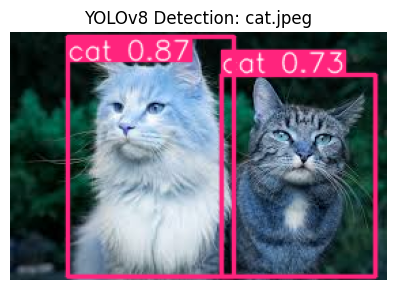

Saved detection to Output_images/detection_cat.jpeg
Found 2 objects
  1. cat: 0.87
  2. cat: 0.73
Processing fire.396.png...

image 1/1 /content/Input_images/fire.396.png: 448x640 1 person, 260.8ms
Speed: 4.2ms preprocess, 260.8ms inference, 2.2ms postprocess per image at shape (1, 3, 448, 640)


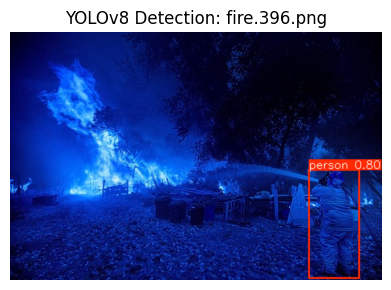

Saved detection to Output_images/detection_fire.396.png
Found 1 objects
  1. person: 0.80
Processing images.jpg...

image 1/1 /content/Input_images/images.jpg: 640x480 1 person, 316.0ms
Speed: 4.0ms preprocess, 316.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


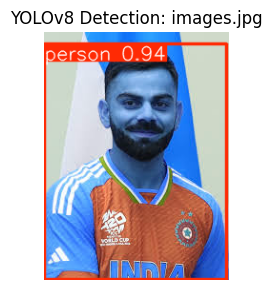

Saved detection to Output_images/detection_images.jpg
Found 1 objects
  1. person: 0.94
Processing bus.jpg...

image 1/1 /content/Input_images/bus.jpg: 448x640 1 car, 1 bus, 278.6ms
Speed: 8.5ms preprocess, 278.6ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)


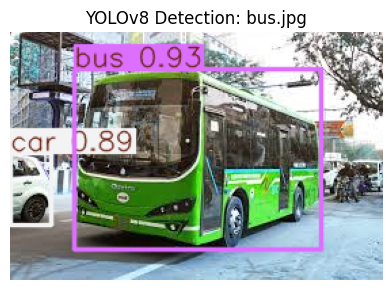

Saved detection to Output_images/detection_bus.jpg
Found 2 objects
  1. bus: 0.93
  2. car: 0.89
Processing flower.jpeg...

image 1/1 /content/Input_images/flower.jpeg: 448x640 (no detections), 313.6ms
Speed: 7.5ms preprocess, 313.6ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


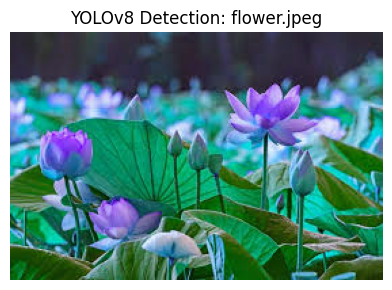

Saved detection to Output_images/detection_flower.jpeg
Found 0 objects
Processing cat.jpeg...

image 1/1 /content/Input_images/cat.jpeg: 448x640 2 cats, 229.7ms
Speed: 4.4ms preprocess, 229.7ms inference, 8.7ms postprocess per image at shape (1, 3, 448, 640)


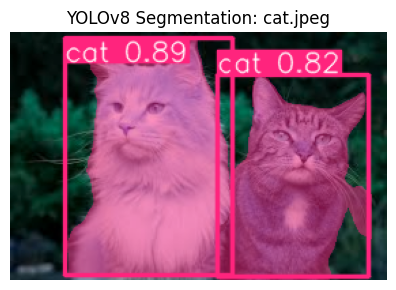

Saved segmentation to Output_images/segmentation_cat.jpeg
Found 2 segmented objects
Processing fire.396.png...

image 1/1 /content/Input_images/fire.396.png: 448x640 1 person, 1 chair, 248.8ms
Speed: 4.3ms preprocess, 248.8ms inference, 8.6ms postprocess per image at shape (1, 3, 448, 640)


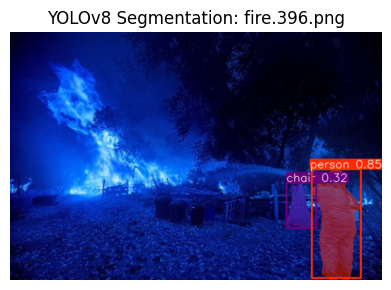

Saved segmentation to Output_images/segmentation_fire.396.png
Found 2 segmented objects
Processing images.jpg...

image 1/1 /content/Input_images/images.jpg: 640x480 1 person, 239.8ms
Speed: 4.0ms preprocess, 239.8ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 480)


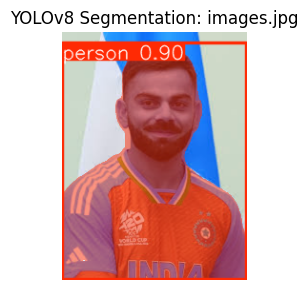

Saved segmentation to Output_images/segmentation_images.jpg
Found 1 segmented objects
Processing bus.jpg...

image 1/1 /content/Input_images/bus.jpg: 448x640 1 car, 2 buss, 259.5ms
Speed: 4.5ms preprocess, 259.5ms inference, 16.5ms postprocess per image at shape (1, 3, 448, 640)


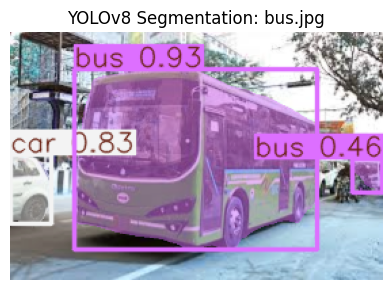

Saved segmentation to Output_images/segmentation_bus.jpg
Found 3 segmented objects
Processing flower.jpeg...

image 1/1 /content/Input_images/flower.jpeg: 448x640 1 bird, 235.3ms
Speed: 4.9ms preprocess, 235.3ms inference, 5.2ms postprocess per image at shape (1, 3, 448, 640)


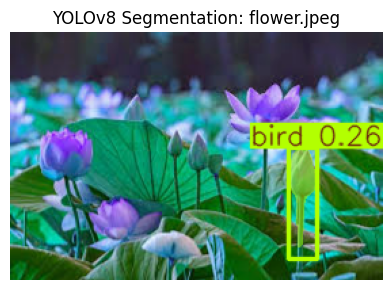

Saved segmentation to Output_images/segmentation_flower.jpeg
Found 1 segmented objects

All tasks completed!


In [11]:
if __name__ == "__main__":
    main()